## Pregunta 4:
### ¿Los departamentos con menor nivel educativo promedio presentan tasas significativamente más altas de violencia intrafamiliar y divorcio en comparación con los estados con mayor nivel educativo promedio?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df_div = pd.read_csv("../files/divorcios_limpio1.csv", sep=",", dtype=str)
df_vio = pd.read_csv("../files/violencia_intrafamiliar_limpio1.csv", sep=",", dtype=str)

In [29]:
df_div['ESCOLARIDAD_HOMBRE_NOMBRE'] = (
    df_div['ESCOLARIDAD_HOMBRE_NOMBRE']
    .str.upper()
    .str.strip()
)

df_div['ESCOLARIDAD_MUJER_NOMBRE'] = (
    df_div['ESCOLARIDAD_MUJER_NOMBRE']
    .str.upper()
    .str.strip()
)

df_div['ESCOLARIDAD_HOMBRE_NOMBRE'].value_counts()
df_div['ESCOLARIDAD_MUJER_NOMBRE'].value_counts()


ESCOLARIDAD_MUJER_NOMBRE
DIVERSIFICADO       14084
PREPRIMARIA          9964
PRIMARIA             6614
BÁSICO               5477
PRIMARIA ADULTOS     3638
Name: count, dtype: int64

In [30]:
df_vio['VIC_ESCOLARIDAD'] = (
    df_vio['VIC_ESCOLARIDAD']
    .str.upper()
    .str.strip()
)

df_vio['VIC_ESCOLARIDAD'].value_counts()

VIC_ESCOLARIDAD
NINGUNA                     52641
26                          22623
10.0                        19664
29                          19276
26.0                        15269
                            ...  
PRIMER AO UNIVERSITARIO       138
CUARTO AO UNIVERSITARIO       117
57                             83
57.0                           29
SEPTIMO AO UNIVERSITARIO        8
Name: count, Length: 73, dtype: int64

In [31]:
#1. Convertir escolaridad a escala numérica
map_educ = {
    'NINGUNO': 0,
    'PREPRIMARIA': 1,
    'PRIMARIA': 2,
    'SECUNDARIA': 3,
    'DIVERSIFICADO': 4,
    'UNIVERSITARIO': 5,
    'BÁSICO': 6,
    'PRIMARIA ADULTOS': 7
}

df_div['ESCOLARIDAD_HOMBRE_NOMBRE'] = df_div['ESCOLARIDAD_HOMBRE_NOMBRE'].str.upper()
df_div['ESCOLARIDAD_MUJER_NOMBRE'] = df_div['ESCOLARIDAD_MUJER_NOMBRE'].str.upper()

df_div['ESC_HOM_NUM'] = df_div['ESCOLARIDAD_HOMBRE_NOMBRE'].map(map_educ)
df_div['ESC_MUJ_NUM'] = df_div['ESCOLARIDAD_MUJER_NOMBRE'].map(map_educ)


In [32]:
#2. Nivel promedio por departamento
educ_depto_div = (
    df_div.groupby('DEPTO_NOMBRE')[['ESC_HOM_NUM','ESC_MUJ_NUM']]
    .mean()
)

educ_depto_div['Educacion_Prom'] = educ_depto_div.mean(axis=1)



In [33]:
#3. Divorcios por departamento
divorcios_depto = df_div.groupby('DEPTO_NOMBRE').size()

In [34]:
#4. Unificación variables
analisis_div = educ_depto_div.copy()
analisis_div['Divorcios'] = divorcios_depto
analisis_div = analisis_div.dropna()

#Correlación
analisis_div['Educacion_Prom'].corr(analisis_div['Divorcios'])


np.float64(0.33387965403364467)

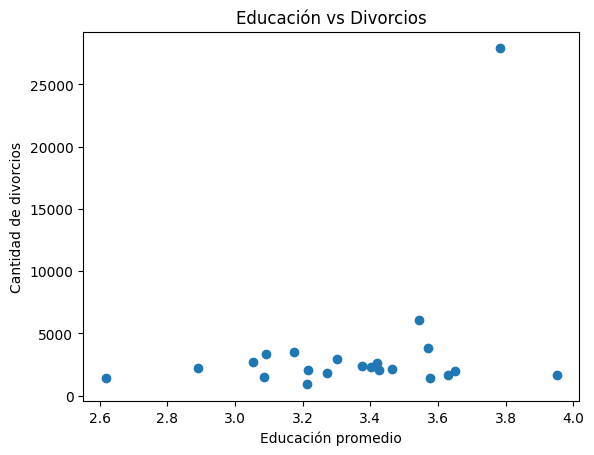

In [35]:
#Gráfica
plt.scatter(analisis_div['Educacion_Prom'], analisis_div['Divorcios'])
plt.xlabel("Educación promedio")
plt.ylabel("Cantidad de divorcios")
plt.title("Educación vs Divorcios")
plt.show()

In [ ]:
#1. Escolaridad Víctima
df_vio['VIC_ESCOLARIDAD'] = df_vio['VIC_ESCOLARIDAD'].astype(str).str.upper().str.strip()

df_vio['VIC_ESCOLARIDAD'] = df_vio['VIC_ESCOLARIDAD'].replace(
    r'^\d+(\.0)?$',
    'NO INDICA',
    regex=True
)

#Mapeo
def clasificar_educ(texto):
    if pd.isna(texto):
        return None
    
    texto = texto.upper()
    
    if 'NO INDICA' in texto or 'IGNORADO' in texto:
        return None
    elif 'NINGUNA' in texto:
        return 0
    elif 'PREPRIMARIA' in texto:
        return 1
    elif 'PRIMARIA' in texto:
        return 2
    elif 'BÁSICO' in texto or 'SECUNDARIA' in texto:
        return 3
    elif 'DIVERSIFICADO' in texto:
        return 4
    elif 'UNIVERSITARIO' in texto:
        return 5
    else:
        return None

df_vio['ESC_VIC_NUM'] = df_vio['VIC_ESCOLARIDAD'].apply(clasificar_educ)




ESC_VIC_NUM
NaN    267245
0.0     52641
2.0     25918
4.0      8482
5.0      1214
Name: count, dtype: int64

In [ ]:
#Educación promedio por departamento en violencia intrafamiliar
df_vio['DEPTO'] = df_vio['DEPTOMCPIO']  # ajusta si es necesario
educ_depto_vio = (
    df_vio.groupby('DEPTO')['ESC_VIC_NUM']
    .mean()
)

#Violencias por departamento
violencia_depto = df_vio.groupby('DEPTO').size()




np.float64(0.013927082556514177)

In [45]:
#2. Unificación variables
analisis_vio = pd.DataFrame({
    'Educacion_Prom': educ_depto_vio,
    'Violencia': violencia_depto
}).dropna()

#Correlación
analisis_vio['Educacion_Prom'].corr(analisis_vio['Violencia'])

np.float64(0.013927082556514177)

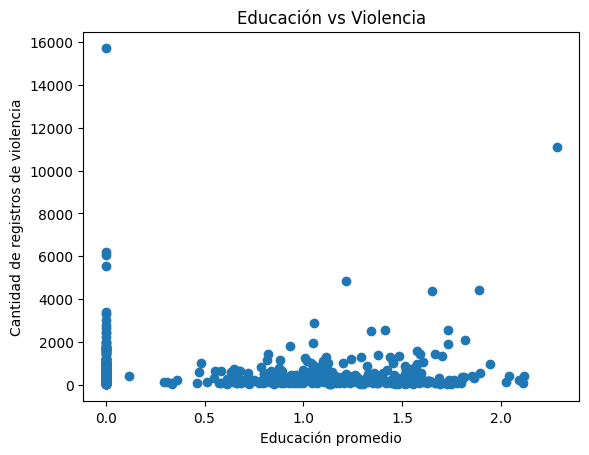

In [48]:
#Gráfica
plt.scatter(analisis_vio['Educacion_Prom'], analisis_vio['Violencia'])
plt.xlabel("Educación promedio")
plt.ylabel("Cantidad de registros de violencia")
plt.title("Educación vs Violencia")
plt.show()